In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
def plot_confusion(y_true, pred):
    labels = [0, 1, 2]
    cm = confusion_matrix(y_true, pred, labels)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    mat = ax.matshow(cm)
    fig.colorbar(mat)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [3]:
# Load iris dataset from sklearn
iris = datasets.load_iris()

# Suffle the data
np.random.seed(0)
np.random.shuffle(iris.data)
np.random.seed(0)
np.random.shuffle(iris.target)

# Split training set
X_train = iris.data[:120, :]
y_train = iris.target[:120]

# Splot test set
X_test = iris.data[-30:, :]
y_test = iris.target[-30:]

In [4]:
class GaussianNB(object):
    
    def __init__(self, num_class):
        self.num_class = num_class
        self.class_prior = []
        self.mean = []
        self.var = []
        
    def __get_class_prior(self, y):
        ''' method to obtain class prior P(Y=ck) '''
        sample_num = float(len(y))
        for label in range(self.num_class):
            c_count = np.sum(y == label)
            self.class_prior.append(c_count / sample_num)
    
    def __get_mean_var(self, X, y):
        ''' method to get mean and variance for each feature'''
        num_features = X.shape[1]
        for c in range(self.num_class):
            class_mean = []
            class_var = []
            class_samples = X[y == c]
            for i in range(num_features):
                mean = np.mean(class_samples[:, i])
                var = np.var(class_samples[:, i])
                class_mean.append(mean)
                class_var.append(var)
            self.mean.append(class_mean)
            self.var.append(class_var)
    
    def fit(self, X, y):
        ''' method to fit the naive bayes model '''
        self.__get_class_prior(y)
        self.__get_mean_var(X, y)
        
    
    def __cal_gaussian_prob(self, xi, mean, var):
        ''' metod to calculate likelihood '''
        inside = (xi - mean) ** 2 / (2 * var)
        numeric = np.sqrt(2 * np.pi * var)
        return np.exp(-inside) / numeric
    
    def __predict_one(self, x):
        class_probs = np.zeros(self.num_class)
        for label in range(self.num_class):
            class_prior = self.class_prior[label]
            likelihood = 1.0
            for i in range(len(x)):
                likelihood *= self.__cal_gaussian_prob(x[i], self.mean[label][i], self.var[label][i])
            prob = likelihood * class_prior
            class_probs[label] = prob
        return np.argmax(class_probs)
    
    def predict(self, X):
        if X.shape[0] == 1:
            return self.__predict_one(X)
        else:
            predict = np.zeros(X.shape[0], dtype=np.int)
            for i in range(X.shape[0]):
                predict[i] = self.__predict_one(X[i])
            return predict

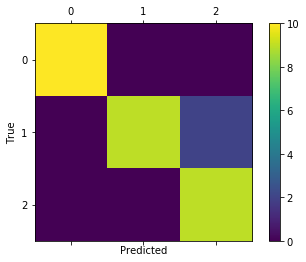

In [5]:
model = GaussianNB(max(y_train)+1)
model.fit(X_train, y_train)
result = model.predict(X_test)
plot_confusion(y_test, result)